# Calculate the observed amplitudes with data.

Define constants

In [20]:
from math import sqrt, radians, atan2, atan, tan, degrees
from IPython.display import Latex
import numpy as np
font_size=14
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import os, sys
sys.path.append('../CommonUtils/')
import CommonUtils as cu

In [21]:
A_bz=   np.array([-0.6, -4.2 , 9.4 , 4.5 ])
A_bz_e= np.array([5.1 , 4.1 , 3.5 ,  2.7 ])
A_bz_mean= 3.7
A_bz_mean_e = 1.8
ds_names=('Run-1a', "Run-1b", "Run-1c", "Run-1d")
# ds_colors=["g", "r", "k", "b"]
# ds_markers=["o", "^", "p", "D"]
ds_colors=["k", "k", "k", "k"]
ds_markers=["o", "o", "o", "o"]

print("Mean B_z=", A_bz_mean, "+-", A_bz_mean_e)

Mean B_z= 3.7 +- 1.8


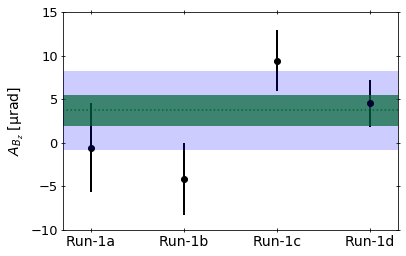

In [22]:
fig, ax = cu.plot_fom(ds_names, A_bz, A_bz_e, ds_colors, ds_markers, y_label=r"$A_{B_z} \ [\rm{\mu}$rad]", no_legend=True)
ax.set_xlim(0.7, 4.3)
ax.set_ylim(-10, 15)
ax.plot([0,5],[A_bz_mean, A_bz_mean], ls=":", c="g", zorder=1)
# ax.plot([0,5],[br_mean+br_mean_e, br_mean+br_mean_e], ls="--", c="orange")
# ax.plot([0,5],[br_mean-br_mean_e, br_mean-br_mean_e], ls="--", c="orange")
ax.set_xlabel("")
plt.xticks(fontsize=14)

ax.add_patch(patches.Rectangle(
        xy=(0, A_bz_mean-A_bz_mean_e),  # point of origin.
        width=5,
        height=A_bz_mean_e*2,
        linewidth=0,
        color='green',
        fill=True,
        alpha=0.7,
        zorder=2
    )
)
ax.add_patch(patches.Rectangle(
        xy=(0, A_bz_mean-A_bz_mean_e*2.5),  # point of origin.
        width=5,
        height=A_bz_mean_e*5,
        linewidth=0,
        color='blue',
        fill=True,
        alpha=0.2,
        zorder=3
    )
)
fig.savefig("../fig/sum_A_bz.png", dpi=300, bbox_inches='tight');

In [23]:
a_edm = 0.13 

$$ \delta ' = \tan\left(\frac{B_z}{B_y}\right)  \approx \frac{B_z}{B_y}$$

In [56]:
delta_lab = A_bz_mean / a_edm
delta_lab_e = A_bz_mean_e / a_edm

print("For A_bz of", A_bz_mean, "urad")

print("Tilt angle in the lab frame", delta_lab, "+-" ,delta_lab_e, "urad or ppm")
print("Tilt angle in the lab frame", round(delta_lab,1), "+-" , round(delta_lab_e,1), "urad or ppm")
print("Tilt angle in the lab frame", round(delta_lab,0), "+-" , round(delta_lab_e,0), "urad or ppm")

For A_bz of 3.7 urad
Tilt angle in the lab frame 28.461538461538463 +- 13.846153846153847 urad or ppm
Tilt angle in the lab frame 28.5 +- 13.8 urad or ppm
Tilt angle in the lab frame 28.0 +- 14.0 urad or ppm


$$ \frac{\Delta \omega_a}{\omega_a} = \frac{1}{2}\left(\frac{(1+a_{\mu})}{a_{\mu}\gamma}\frac{B_z}{B_y}\right)^2 $$

In [25]:
aMuon= 11659208.9e-10  
betaGammaMagicSquared = (1.0 / aMuon)
gammaMagicSquared = (1.0 + betaGammaMagicSquared)
gammaMagic=sqrt(gammaMagicSquared)
print("ɣ"+"={0:.5f}".format(gammaMagic))

ɣ=29.30343


In [62]:
def func_omega(delta):
    delta = delta*1e-6 # input in ppm
    corr = 0.5 * ( ( (1+aMuon)/(aMuon*gammaMagic) ) * delta )**2
    return corr*1e+6 # output in ppm

In [114]:
delta_omega = func_omega(delta_lab)
delta_omega_e = func_omega(delta_lab_e)

print("For tilt of", delta_lab, "ppm")

print("Omega_a correction", delta_omega, "+-" ,delta_omega_e, "ppm")
print("Omega_a correction", round(delta_omega,1), "+-" , round(delta_omega_e,1), "ppm")

delta_omega_e_P = func_omega( (delta_lab+delta_lab_e) )
delta_omega_e_M = func_omega( (delta_lab-delta_lab_e) )

print("Omega_a correction", round(delta_omega,2), "+" , round(delta_omega_e_P-delta_omega,2),"-",round(delta_omega-delta_omega_e_M,2),  "ppm")
print("Omega_a correction", round(delta_omega,1), "+" , round(delta_omega_e_P-delta_omega,1), "-",round(delta_omega-delta_omega_e_M,1),  "ppm")


For tilt of 28.461538461538463 ppm
Omega_a correction 0.34779531075557574 +- 0.08231240371424876 ppm
Omega_a correction 0.3 +- 0.1 ppm
Omega_a correction 0.35 + 0.42 - 0.26 ppm
Omega_a correction 0.3 + 0.4 - 0.3 ppm


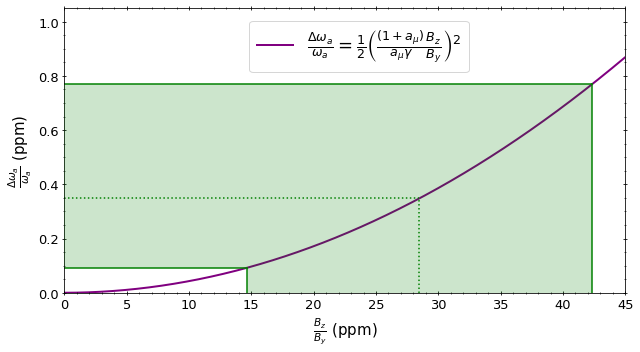

In [141]:
delta_test = np.linspace(0, 45, 2000)
fig, ax = cu.plot(delta_test, func_omega(delta_test), figsize=(9,5), plot=True, lw=2, ls="-", c="purple", label=r"$ \frac{\Delta \omega_a}{\omega_a} = \frac{1}{2}\left(\frac{(1+a_{\mu})}{a_{\mu}\gamma}\frac{B_z}{B_y}\right)^2$")
ax.set_xlabel(r"$\frac{B_z}{B_y}$ (ppm)", fontsize=15)
ax.set_ylabel(r"$\frac{\Delta \omega_a}{\omega_a}$ (ppm)", fontsize=15)
ax.set_xlim(0, 45)
ax.set_ylim(0, 1.05)

ax.plot([delta_lab,delta_lab],[0, delta_omega], ls=":", c="g", zorder=1)
ax.plot([delta_lab-delta_lab_e,delta_lab-delta_lab_e],[0, delta_omega_e_M], ls="-", c="g", zorder=1)
ax.plot([delta_lab+delta_lab_e,delta_lab+delta_lab_e],[0, delta_omega_e_P], ls="-", c="g", zorder=1)

ax.plot([0,delta_lab],[delta_omega, delta_omega], ls=":", c="g", zorder=1)
ax.plot([0,delta_lab+delta_lab_e],[delta_omega_e_P, delta_omega_e_P], ls="-", c="g", zorder=1)
ax.plot([0,delta_lab-delta_lab_e],[delta_omega_e_M, delta_omega_e_M], ls="-", c="g", zorder=1)

ax.add_patch(patches.Rectangle(
        xy=(0, delta_omega_e_M),  # point of origin.
        width=delta_lab+delta_lab_e,
        height=delta_omega_e_P-delta_omega_e_M,
        linewidth=0,
        color='green',
        fill=True,
        alpha=0.2,
        zorder=3
    )
)

ax.add_patch(patches.Rectangle(
        xy=(delta_lab-delta_lab_e, 0),  # point of origin.
        width=delta_lab_e*2,
        height=delta_omega_e_M,
        linewidth=0,
        color='green',
        fill=True,
        alpha=0.2,
        zorder=3
    )
)

ax.legend(fontsize=18, loc=(0.33, 0.775))
fig.tight_layout()
plt.savefig("../fig/bz_money.png", dpi=200)